# Boston City Score - Metrics Analysis and Visualization
#### Author: Debanjan Saha
#### Affiliation: Northeastern University, Boston, MA

#### Description:

This provides a comprehensive study of the open-source data [Boston City Score](https://data.boston.gov/dataset/cityscore/resource/dd657c02-3443-4c00-8b29-56a40cfe7ee4).

This data covers several indicators that are used to provide a score to public facilities and emergency response systems. If the score is 1 or higher, the predicted reaction was met, and vice versa.

In this notebook, we visualize the performance of several measures using the timeseries data.



## Data Dictionary

In [1]:
from IPython.display import IFrame
IFrame(src="https://data.boston.gov/dataset/cityscore/resource/db7b8b86-5c35-45b2-9276-5a6527ae6edc/view/8b7ecb4f-edad-4c8a-af46-a16e29af995c", width=700, height=400)

## Import Libraries

In [2]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
# sns.set_context("notebook", font_scale=1.5), rc={"lines.linewidth": 2.5, 'font.family':'Helvetica'})

## API GET Request

In [3]:
# Sample API GET Request
data = requests.get('https://data.boston.gov/api/3/action/datastore_search?resource_id=dd657c02-3443-4c00-8b29-56a40cfe7ee4&limit=1')
data.json()

{'help': 'https://data.boston.gov/api/3/action/help_show?name=datastore_search',
 'success': True,
 'result': {'include_total': True,
  'resource_id': 'dd657c02-3443-4c00-8b29-56a40cfe7ee4',
  'fields': [{'type': 'int', 'id': '_id'},
   {'type': 'text', 'id': 'metric_name'},
   {'type': 'text', 'id': 'score_calculated_ts'},
   {'type': 'text', 'id': 'target'},
   {'type': 'text', 'id': 'metric_logic'},
   {'type': 'text', 'id': 'day_score'},
   {'type': 'text', 'id': 'day_numerator'},
   {'type': 'text', 'id': 'day_denominator'},
   {'type': 'text', 'id': 'week_score'},
   {'type': 'text', 'id': 'week_numerator'},
   {'type': 'text', 'id': 'week_denominator'},
   {'type': 'text', 'id': 'month_score'},
   {'type': 'text', 'id': 'month_numerator'},
   {'type': 'text', 'id': 'month_denominator'},
   {'type': 'text', 'id': 'quarter_score'},
   {'type': 'text', 'id': 'quarter_numerator'},
   {'type': 'text', 'id': 'quarter_denominator'},
   {'type': 'text', 'id': 'latest_score_flag'}],
  'r

In [4]:
def read_data_api(api_key, row_limit):
    """
    Read the data from the open source Boston City Score API
    Fetch all the paginated data from the API and convert into a Pandas Dataframe

    Sample API call to fetch the data: 
    https://data.boston.gov/api/3/action/datastore_search?resource_id=dd657c02-3443-4c00-8b29-56a40cfe7ee4&limit=5
    
    :return: <Pandas dataframe object>
    """
    data_url = 'https://data.boston.gov'
    api_handle = '/api/3/action/datastore_search'
    fetch_url = (f"{data_url}{api_handle}?resource_id={api_key}&limit={row_limit}")

    # initial request
    req = requests.get(fetch_url).json()
    total_results = req["result"]["total"]
    all_records = req["result"]["records"]
    fields = [c["id"] for c in req["result"]["fields"]]

    # page through
    while len(all_records) < total_results:
        next_url = req["result"]["_links"]["next"]
        req = requests.get(data_url + next_url).json()
        all_records.extend(req["result"]["records"])

    # convert to dataframe and fix column order
    df = pd.DataFrame(all_records)
    df = df.reindex(columns=fields)
    return df

## Get Data

In [5]:
api_key = 'dd657c02-3443-4c00-8b29-56a40cfe7ee4'
row_limit =  '50'
data = read_data_api(api_key, row_limit)
data.head()

,_id,metric_name,score_calculated_ts,target,metric_logic,day_score,day_numerator,day_denominator,week_score,week_numerator,week_denominator,month_score,month_numerator,month_denominator,quarter_score,quarter_numerator,quarter_denominator,latest_score_flag
0,1,BFD INCIDENTS,2022-10-07 11:20:04.717226,None,historical_average / current_average,None,235.909090909091,None,1.00570258000221,235.909090909091,234.571428571429,0.979890560875513,238.766666666667,243.666666666667,0.934911333175868,229.886567164179,245.891304347826,1
1,2,PART 1 CRIMES,2022-10-07 11:35:01.898868,None,historical_average / current_average,None,55.4285714285714,None,1.54581673306773,55.4285714285714,35.8571428571429,1.45694200351494,55.2666666666667,37.9333333333333,1.37319236592994,56.2262569832402,40.945652173913,1
2,3,STREETLIGHT ON-TIME %,2022-10-07 11:40:11.17987,0.8,sum(numerator_value)/sum(denominator_value)/ta...,0.25,1,5,0.5078125,26,64,0.554979253112033,107,241,0.575313807531381,330,717,1
3,4,PARKS MAINTENANCE ON-TIME %,2022-10-07 11:45:07.463976,0.8,sum(numerator_value)/sum(denominator_value)/ta...,0.795454545454545,7,11,1.08766233766234,67,77,0.950255102040816,298,392,0.917941585535466,1056,1438,1
4,5,LIBRARY USERS,2022-10-06 09:00:08.077163,None,current_average / historical_average,1.45772954924875,12936,8874.07407407407,1.44852134509897,12854.2857142857,8874.07407407407,1.4499525742687,12738.8,8785.66666666667,1.43169168186894,12632.0434782609,8823.15909090909,0


In [6]:
print("Number of records in the dataset: {}".format(data.shape[0]))
print("Number of dimensions in the dataset: {}".format(data.shape[1]))
print("Column Description")
data.info()

Number of records in the dataset: 40496
Number of dimensions in the dataset: 18
Column Description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40496 entries, 0 to 40495
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _id                  40496 non-null  int64 
 1   metric_name          40496 non-null  object
 2   score_calculated_ts  40496 non-null  object
 3   target               30114 non-null  object
 4   metric_logic         40496 non-null  object
 5   day_score            26628 non-null  object
 6   day_numerator        31310 non-null  object
 7   day_denominator      26943 non-null  object
 8   week_score           37468 non-null  object
 9   week_numerator       38996 non-null  object
 10  week_denominator     37692 non-null  object
 11  month_score          39771 non-null  object
 12  month_numerator      40023 non-null  object
 13  month_denominator    39873 non-null  object
 14  qua

## Data Cleanup

In [9]:
# Data Type Manipulation

def column_datatype(df):
    """
    Data type conversion: 
    1. Date field manipulation and segregation
    2. Convert all numeric columns from string to numbers

    :param df: input raw Pandas datafranme
    :return: <Pandas dataframe object>
    """
    # set id column to index
    df = df.set_index("_id")

    # segregate datetime fields
    df["score_calculated_ts"]  = pd.to_datetime(df["score_calculated_ts"])
    df["day"]                  = df["score_calculated_ts"].dt.date - pd.DateOffset(days=1)
    df["week"]                 = df["day"].dt.to_period("W-SUN").dt.to_timestamp()
    df["month"]                = df["day"].dt.to_period("M").dt.to_timestamp()
    df["quarter"]              = df["day"].dt.to_period("Q").dt.to_timestamp()
    df["year"]                 = df["day"].dt.year
    
    
    # set numeric fields from string to numbers
    df["target"]               = pd.to_numeric(df["target"], errors="coerce")
    df["day_score"]            = pd.to_numeric(df["day_score"], errors="coerce")
    df["day_numerator"]        = pd.to_numeric(df["day_numerator"], errors="coerce")
    df["day_denominator"]      = pd.to_numeric(df["day_denominator"], errors="coerce")
    df["week_score"]           = pd.to_numeric(df["week_score"], errors="coerce")
    df["week_numerator"]       = pd.to_numeric(df["week_numerator"], errors="coerce")
    df["week_denominator"]     = pd.to_numeric(df["week_denominator"], errors="coerce")
    df["month_score"]          = pd.to_numeric(df["month_score"], errors="coerce")
    df["month_numerator"]      = pd.to_numeric(df["month_numerator"], errors="coerce")
    df["month_denominator"]    = pd.to_numeric(df["month_denominator"], errors="coerce")
    df["quarter_score"]        = pd.to_numeric(df["quarter_score"], errors="coerce")
    df["quarter_numerator"]    = pd.to_numeric(df["quarter_numerator"], errors="coerce")
    df["quarter_denominator"]  = pd.to_numeric(df["quarter_denominator"], errors="coerce")
    
    # set latest record flag to boolean
    df["latest_score_flag"]    = df["latest_score_flag"].astype(int).astype(bool)
    
    return df

In [10]:
data_clean_1 = column_datatype(data)
data_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40496 entries, 1 to 40496
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   metric_name          40496 non-null  object        
 1   score_calculated_ts  40496 non-null  datetime64[ns]
 2   target               30114 non-null  float64       
 3   metric_logic         40496 non-null  object        
 4   day_score            26628 non-null  float64       
 5   day_numerator        31310 non-null  float64       
 6   day_denominator      26943 non-null  float64       
 7   week_score           37468 non-null  float64       
 8   week_numerator       38996 non-null  float64       
 9   week_denominator     37692 non-null  float64       
 10  month_score          39771 non-null  float64       
 11  month_numerator      40023 non-null  float64       
 12  month_denominator    39873 non-null  float64       
 13  quarter_score        39625 non-

In [11]:
data_clean_1.head()

,metric_name,score_calculated_ts,target,metric_logic,day_score,day_numerator,day_denominator,week_score,week_numerator,week_denominator,...,month_denominator,quarter_score,quarter_numerator,quarter_denominator,latest_score_flag,day,week,month,quarter,year
_id,,,,,,,,,,,,,,,,,,,,,
1,BFD INCIDENTS,2022-10-07 11:20:04.717226,NaN,historical_average / current_average,NaN,235.909091,NaN,1.005703,235.909091,234.571429,...,243.666667,0.934911,229.886567,245.891304,True,2022-10-06,2022-10-03,2022-10-01,2022-10-01,2022
2,PART 1 CRIMES,2022-10-07 11:35:01.898868,NaN,historical_average / current_average,NaN,55.428571,NaN,1.545817,55.428571,35.857143,...,37.933333,1.373192,56.226257,40.945652,True,2022-10-06,2022-10-03,2022-10-01,2022-10-01,2022
3,STREETLIGHT ON-TIME %,2022-10-07 11:40:11.179870,0.8,sum(numerator_value)/sum(denominator_value)/ta...,0.250000,1.000000,5.000000,0.507812,26.000000,64.000000,...,241.000000,0.575314,330.000000,717.000000,True,2022-10-06,2022-10-03,2022-10-01,2022-10-01,2022
4,PARKS MAINTENANCE ON-TIME %,2022-10-07 11:45:07.463976,0.8,sum(numerator_value)/sum(denominator_value)/ta...,0.795455,7.000000,11.000000,1.087662,67.000000,77.000000,...,392.000000,0.917942,1056.000000,1438.000000,True,2022-10-06,2022-10-03,2022-10-01,2022-10-01,2022
5,LIBRARY USERS,2022-10-06 09:00:08.077163,NaN,current_average / historical_average,1.457730,12936.000000,8874.074074,1.448521,12854.285714,8874.074074,...,8785.666667,1.431692,12632.043478,8823.159091,False,2022-10-05,2022-10-03,2022-10-01,2022-10-01,2022


## Metrics

In [12]:
# Display all unique metrics
data_clean_1.metric_name.unique()

array(['BFD INCIDENTS', 'PART 1 CRIMES', 'STREETLIGHT ON-TIME %',
       'PARKS MAINTENANCE ON-TIME %', 'LIBRARY USERS', 'BPS ATTENDANCE',
       '311 CALL CENTER PERFORMANCE', 'GRAFFITI ON-TIME %',
       'SIGNAL REPAIR ON-TIME %', 'TREE MAINTENANCE ON-TIME %',
       '311 CONSTITUENT EXPERIENCE SURVEYS', 'POTHOLE ON-TIME %',
       'SIGN INSTALLATION ON-TIME %', 'CODE ENFORCEMENT ON-TIME %',
       'MISSED TRASH ON-TIME %', 'CODE ENFORCEMENT TRASH COLLECTION',
       'BFD RESPONSE TIME', 'ON-TIME PERMIT REVIEWS', 'EMS RESPONSE TIME',
       'CITY SERVICES SATISFACTION SURVEYS', 'HOMICIDES (TREND)',
       'SHOOTINGS (TREND)', 'STABBINGS (TREND)'], dtype=object)

## Current Data

In [13]:
# view current scores
def highlight_values(s, gt_arg='', lt_arg=''):
    """
    Highlight rows where value is greater than or less than 1
    """
    return np.where(s >= 1, gt_arg, lt_arg)

curr_data = data_clean_1[data_clean_1['latest_score_flag'] == True]
curr_data_disp = curr_data.groupby('metric_name', as_index=False)[['day_score', 'week_score', 'month_score', 'quarter_score']].apply(max)
slice_ = curr_data_disp.columns[1:]
curr_data_disp.style.apply(highlight_values, gt_arg='color:green;', lt_arg='color:red', axis=0, subset=slice_)

,metric_name,day_score,week_score,month_score,quarter_score
0,311 CALL CENTER PERFORMANCE,0.925886,0.819550,0.849165,0.885352
1,311 CONSTITUENT EXPERIENCE SURVEYS,nan,1.250000,1.194444,1.138889
2,BFD INCIDENTS,nan,1.005703,0.979891,0.934911
3,BFD RESPONSE TIME,nan,0.936239,0.924684,0.934179
4,BPS ATTENDANCE,nan,nan,0.923094,0.966273
5,CITY SERVICES SATISFACTION SURVEYS,nan,0.825000,0.643720,0.738706
6,CODE ENFORCEMENT ON-TIME %,1.250000,1.250000,1.239174,1.238996
7,CODE ENFORCEMENT TRASH COLLECTION,1.250000,1.162709,1.193970,1.148341
8,GRAFFITI ON-TIME %,0.065789,0.118421,0.140482,0.169406
9,HOMICIDES (TREND),nan,1.000000,1.187500,1.153421


# Visualizations

## Time Series Plots

In [14]:
def plot_scores(df, df_label):
    """
    Timeseries Plotting Function
    Plots timeseries data into daily, weekly, monthly and quarterly resolutions

    :param df: input dataframe for plotting
    :param df_label: label used as title for plot
    :return: None
    """

    fig, axs = plt.subplots(2, 2, figsize=(20,8), squeeze=True) # , sharex=True, sharey=True)

    sns.lineplot(x='day', y='day_score', data=df, color='b', ax=axs[0][0])
    axs[0][0].tick_params(labelrotation=35)
    axs[0][0].set_title(f"{df_label} Daily Score")

    sns.lineplot(x='day', y='week_score', data=df, color='g', ax=axs[0][1])
    axs[0][1].tick_params(labelrotation=35)
    axs[0][1].set_title(f"{df_label} Weekly Score")

    sns.lineplot(x='day', y='month_score', data=df, color='y', ax=axs[1][0])
    axs[1][0].tick_params(labelrotation=35)
    axs[1][0].set_title(f"{df_label} Monthly Score")

    sns.lineplot(x='day', y='quarter_score', data=df, color='r', ax=axs[1][1])
    axs[1][1].tick_params(labelrotation=35)
    axs[1][1].set_title(f"{df_label} Quarterly Score")

    fig.suptitle(f"{df_label}", fontsize=15, va="bottom")
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()

### EMS RESPONSE TIME

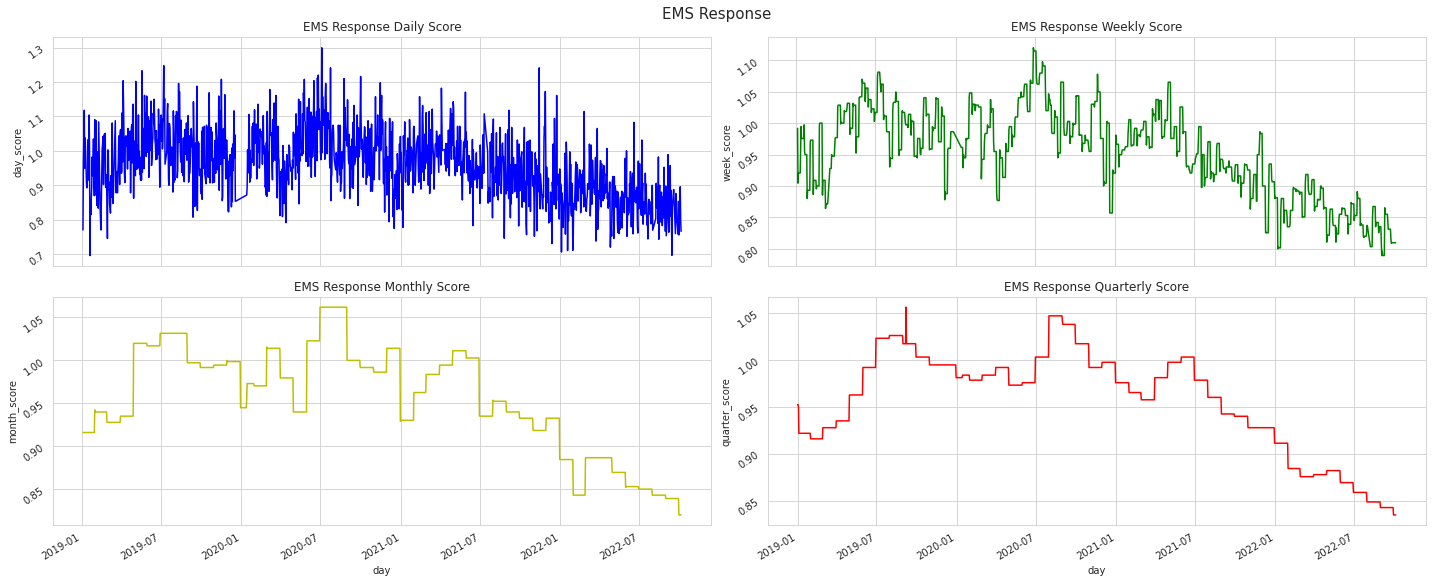

In [15]:
ems_df = data_clean_1[data_clean_1['metric_name'] == 'EMS RESPONSE TIME'] #.dropna()
ems_df = ems_df[ems_df['year'] >= 2019]
plot_scores(ems_df, 'EMS Response')

### 311 CALL CENTER PERFORMANCE

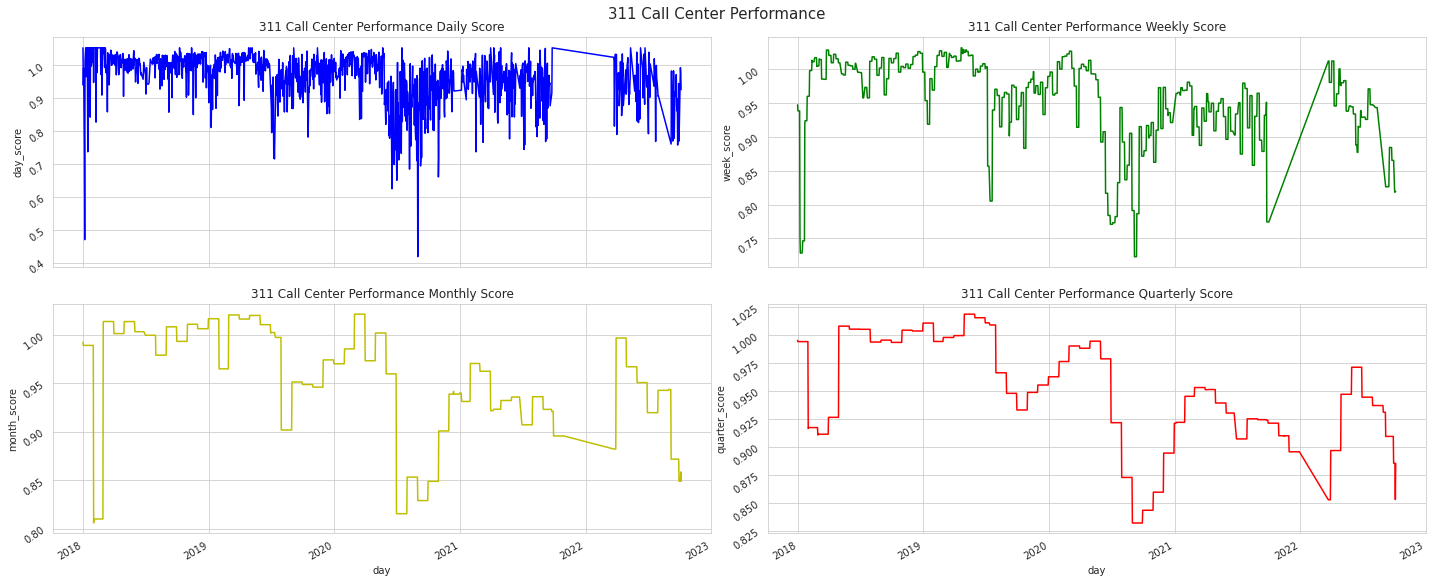

In [16]:
# 311 CALL CENTER PERFORMANCE
cc311_df = data_clean_1[data_clean_1['metric_name'] == '311 CALL CENTER PERFORMANCE'] #.dropna()
plot_scores(cc311_df, '311 Call Center Performance')

### STREETLIGHT ON-TIME %

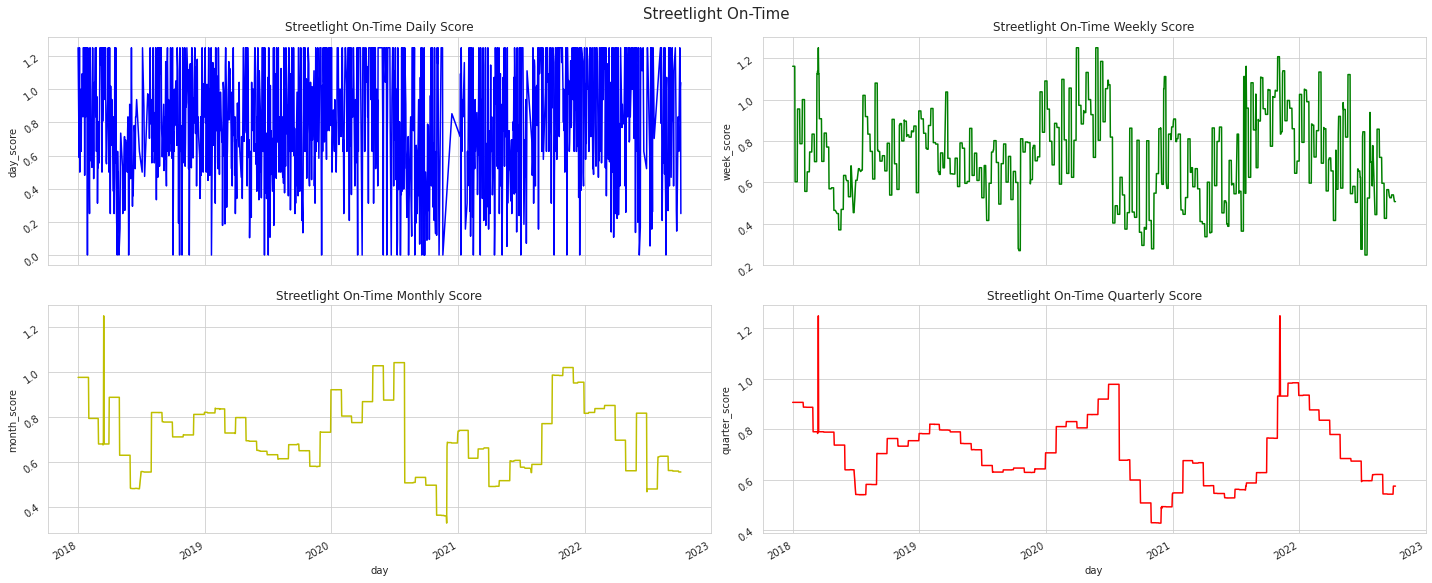

In [17]:
# STREETLIGHT ON-TIME %
srton_df = data_clean_1[data_clean_1['metric_name'] == 'STREETLIGHT ON-TIME %'] #.dropna()
plot_scores(srton_df, 'Streetlight On-Time')

### SIGN INSTALLATION ON-TIME %

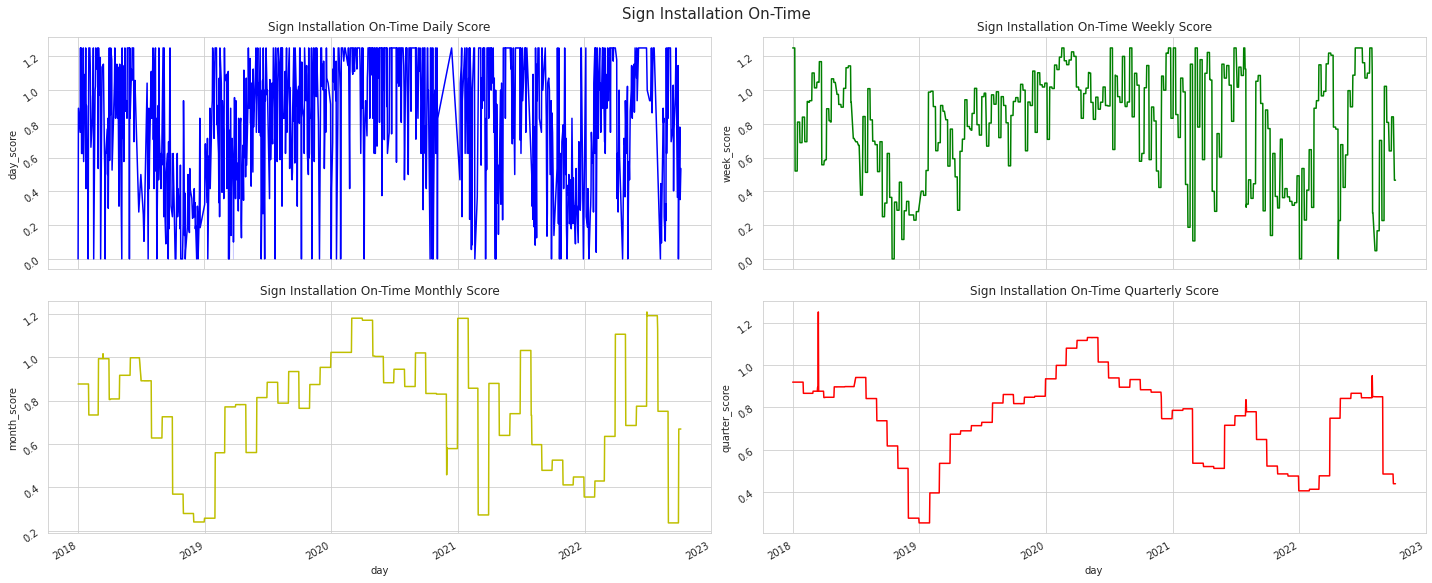

In [18]:
# SIGN INSTALLATION ON-TIME %
signins_df = data_clean_1[data_clean_1['metric_name'] == 'SIGN INSTALLATION ON-TIME %'] #.dropna()
plot_scores(signins_df, 'Sign Installation On-Time')

## CRIME ANALYSIS

### PART 1 CRIMES

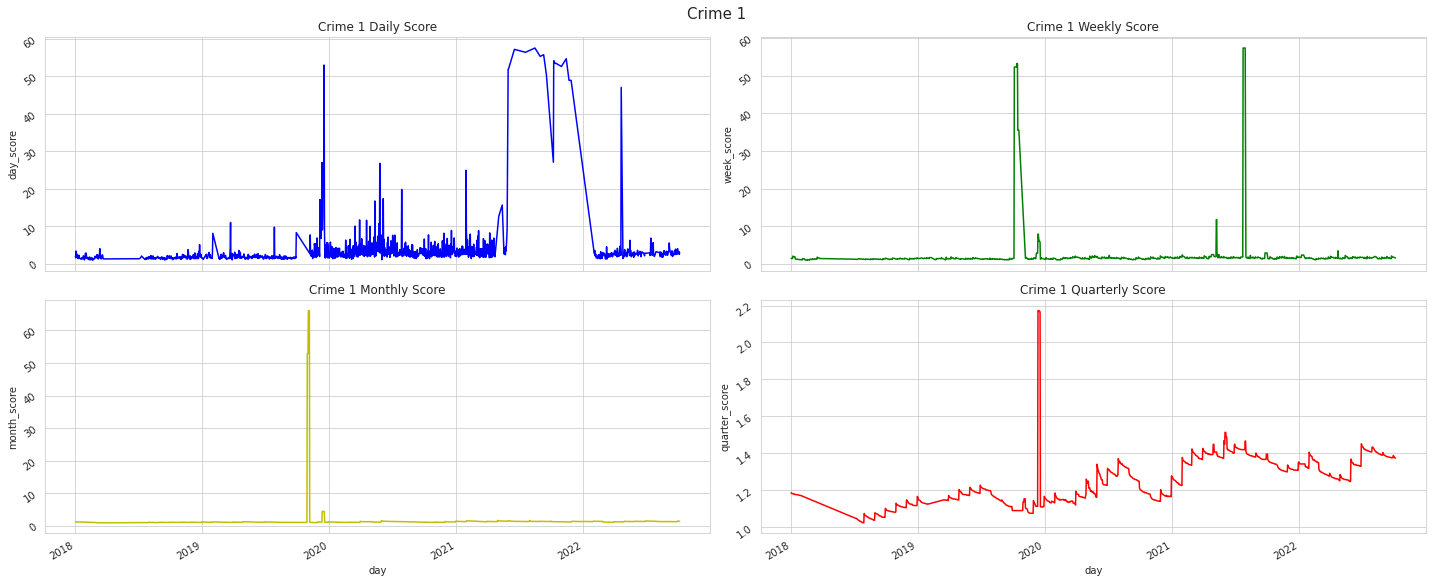

In [19]:
# PART 1 CRIMES
crime1_df = data_clean_1[data_clean_1['metric_name'] == 'PART 1 CRIMES'] #.dropna()
# crime1_df.head()
plot_scores(crime1_df, 'Crime 1')

### HOMICIDES (TREND)

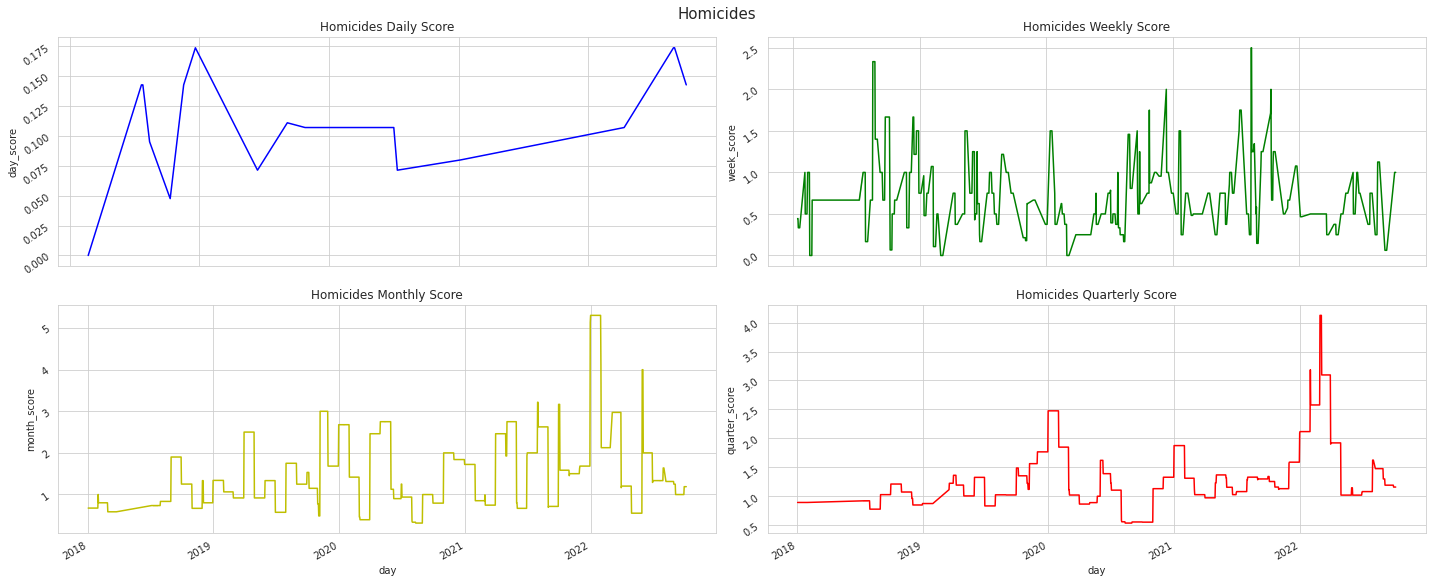

In [20]:
# HOMICIDES (TREND)
homi_df = data_clean_1[data_clean_1['metric_name'] == 'HOMICIDES (TREND)'] #.dropna()
plot_scores(homi_df, 'Homicides')

### SHOOTINGS (TREND) 	

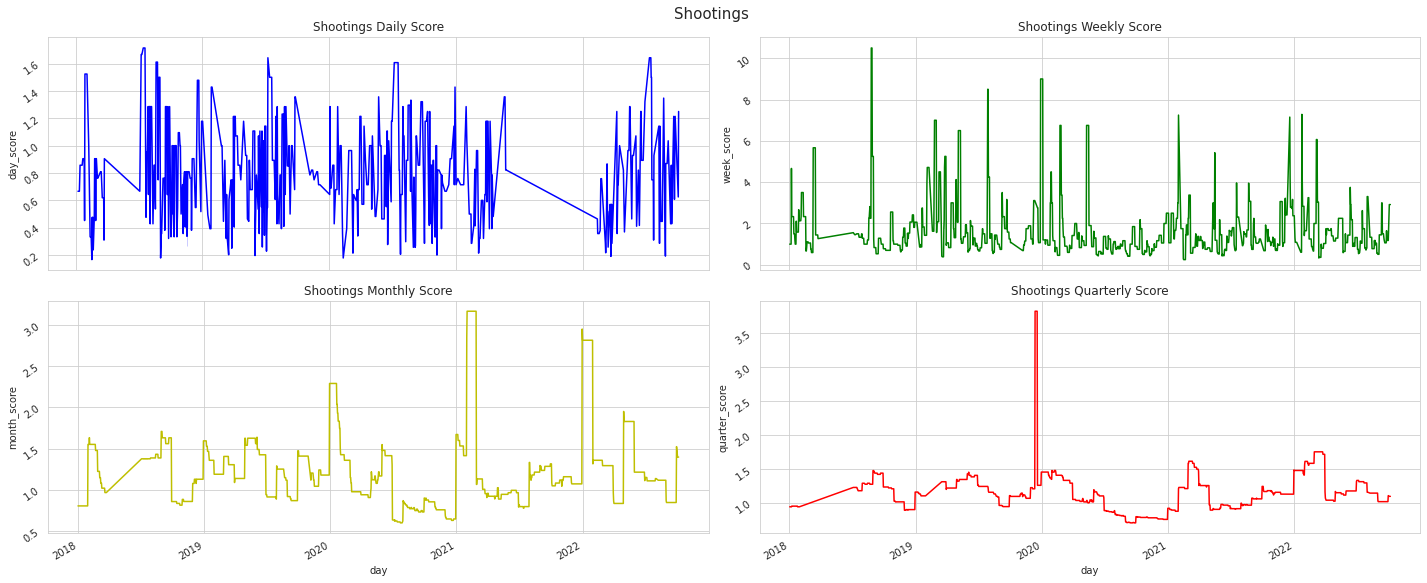

In [21]:
# SHOOTINGS (TREND)
shoot_df = data_clean_1[data_clean_1['metric_name'] == 'SHOOTINGS (TREND)'] #.dropna()
plot_scores(shoot_df, 'Shootings')

### STABBINGS (TREND)

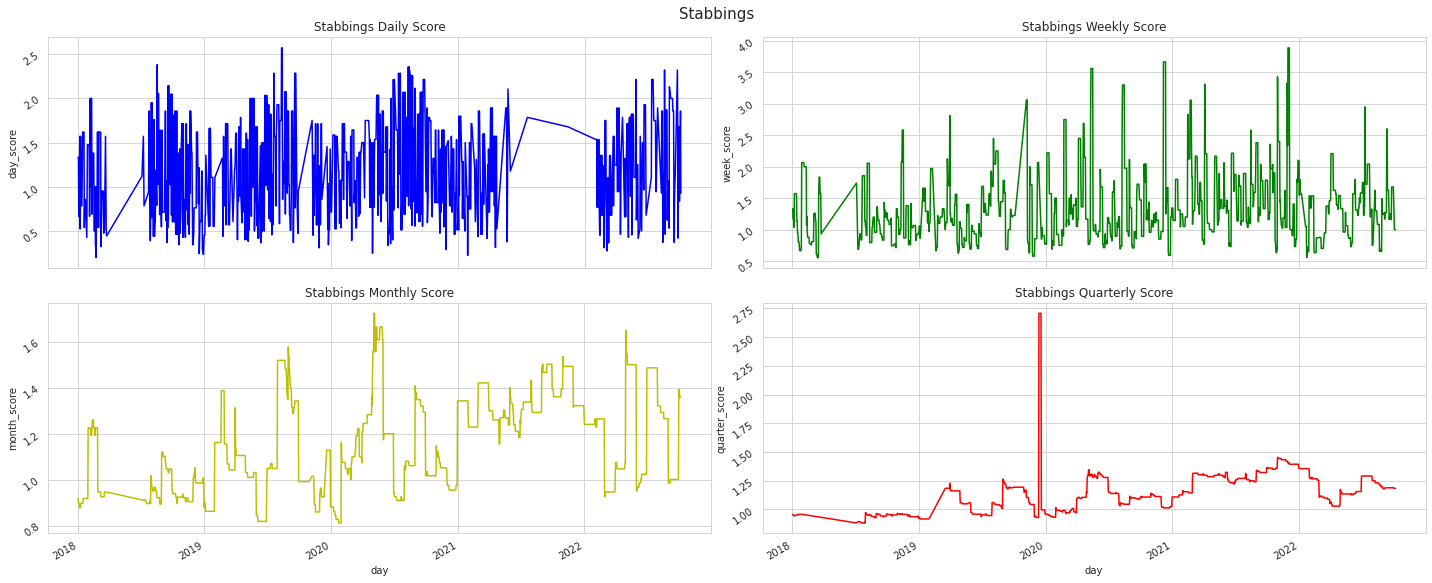

In [22]:
# STABBINGS (TREND)
stab_df = data_clean_1[data_clean_1['metric_name'] == 'STABBINGS (TREND)'] #.dropna()
plot_scores(stab_df, 'Stabbings')

## Heat Map Plot

In [23]:
"""
Transform the data for Heatmap Plotting
    Convert the daily, weekly, monthly, and quarterly scores into binary step activation 
    based on a threshold value of 1, which means satisfactory performance.
"""

heat_raw = data_clean_1.loc[:, ('metric_name', 'score_calculated_ts', 
                                'day', 'week', 'month', 'quarter', 
                                'day_score', 'week_score', 'month_score', 'quarter_score')].copy()
heat_raw['day_ht'] = np.where(heat_raw['day_score'] >= 1, 1, 0)
heat_raw['week_ht'] = np.where(heat_raw['week_score'] >= 1, 1, 0)
heat_raw['mon_ht'] = np.where(heat_raw['month_score'] >= 1, 1, 0)
heat_raw['qtr_ht'] = np.where(heat_raw['quarter_score'] >= 1, 1, 0)
heat_raw.drop(['day_score','week_score','month_score','quarter_score'], 
              axis=1, inplace=True)
heat_raw.head()

,metric_name,score_calculated_ts,day,week,month,quarter,day_ht,week_ht,mon_ht,qtr_ht
_id,,,,,,,,,,
1,BFD INCIDENTS,2022-10-07 11:20:04.717226,2022-10-06,2022-10-03,2022-10-01,2022-10-01,0,1,0,0
2,PART 1 CRIMES,2022-10-07 11:35:01.898868,2022-10-06,2022-10-03,2022-10-01,2022-10-01,0,1,1,1
3,STREETLIGHT ON-TIME %,2022-10-07 11:40:11.179870,2022-10-06,2022-10-03,2022-10-01,2022-10-01,0,0,0,0
4,PARKS MAINTENANCE ON-TIME %,2022-10-07 11:45:07.463976,2022-10-06,2022-10-03,2022-10-01,2022-10-01,0,1,0,0
5,LIBRARY USERS,2022-10-06 09:00:08.077163,2022-10-05,2022-10-03,2022-10-01,2022-10-01,1,1,1,1


In [24]:
def wide_tfx_data(df, grain_col, sum_col):
    """
    Group the data by a certain granularity
    Pivot the grouped data from long form to wide form for heatmap
    
    :param df: Long form datafrane for conversion
    :param grain_col: column which will be used for grouping
    :param sum_col: column which will be used for aggregation (sum)
    :return: <pandas dataframe object>
    """

    group_cols = ['metric_name', grain_col]
    # Grouping Operation
    grp_df = df.groupby(group_cols, as_index=False)[sum_col].sum()
    
    # Pivot dataset for Heatmap
    pvt_df = grp_df.pivot(index='metric_name', columns=grain_col, values=sum_col)
    
    return pvt_df

In [25]:
def plot_heatmap(df, dt_fmt, plt_title=''):
    """
    Plot Heatmap with color level based on increasing performance metrics
    That is, if color is near pink means poor performance or data not available
    More the color is towards the blue spectrum means better performance

    :param df: Input dataframe for plotting
    :param dt_fmt: Granularity of plots
    :param plt_title: Title of plot

    :return: plots 
    """


    fig, ax = plt.subplots(figsize=(35, 10))
    sns.heatmap(df, 
                center = 10.0,
                cmap=sns.diverging_palette(20, 220, n=200), # "coolwarm"
                square=True)
    ax.set_xticklabels([date_cols.strftime(dt_fmt) for date_cols in df.columns], 
                       horizontalalignment='right')
    ax.set_title(plt_title, fontdict={'fontsize': 30, 'fontweight': 'medium'})
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=16)
    plt.tight_layout()
    fig.autofmt_xdate()

### Monthly Performance Heatmap

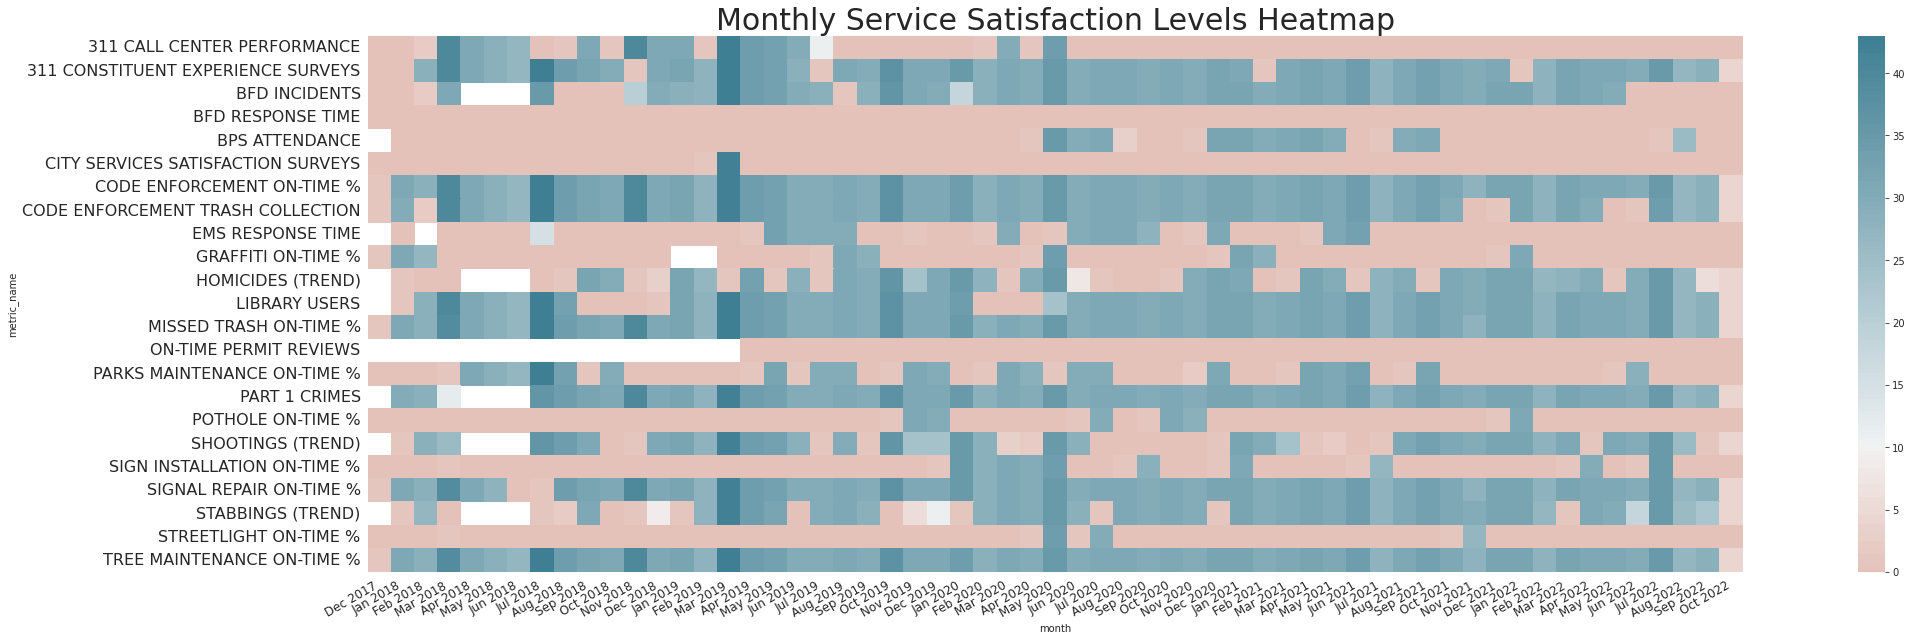

In [26]:
month_df = wide_tfx_data(heat_raw, 'month', 'mon_ht')
plot_heatmap(month_df, '%b %Y', 'Monthly Service Satisfaction Levels Heatmap')

### Quarterly Performance Heatmap

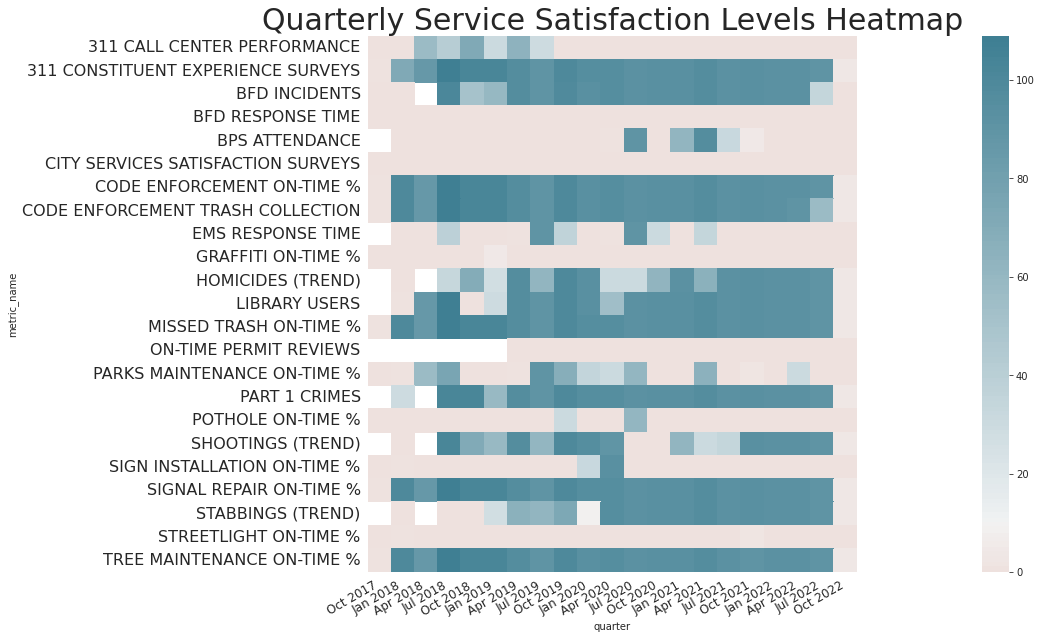

In [27]:
quarter_df = wide_tfx_data(heat_raw, 'quarter', 'qtr_ht')
plot_heatmap(quarter_df, '%b %Y', 'Quarterly Service Satisfaction Levels Heatmap')